In [50]:
!pip install yfinance


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/63.2 kB ? eta -:--:--
                                              0.0/63.2 kB ? eta -:--:--
     ------                                   10.2/63.2 kB ? eta -:--:--
     ------                                   10.2/63.2 kB ? eta -:--:--
     ------                                   10.2/63.2 kB ? eta -:--:--
     ------                                   10.2/63.2 kB ? eta -:--:--
     ------                                   10.2/63.2 kB ? eta -:--:--
     ------------                            20.5/63.2 kB 43.8 kB/s eta 0:00:01
     ------------------------------         51.2/63.2 kB 145.8 kB/s eta 0:00:01
     -------------------------------------- 63.2/63.2 kB 169.7 kB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
                                              0.0/112.2 kB ? eta -:--:--
                                              0.0/112.2 kB ? eta -:--:--
     ---                                      10

In [51]:
import yfinance as yf

In [53]:
### importing s&p500 stockprice data
sp500 = yf.Ticker('^GSPC')

In [54]:
sp500 = sp500.history(period = 'max')

In [55]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [56]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
               '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00',
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24013, freq=None)

## Cleaning and Visualizing Data

<Axes: xlabel='Date'>

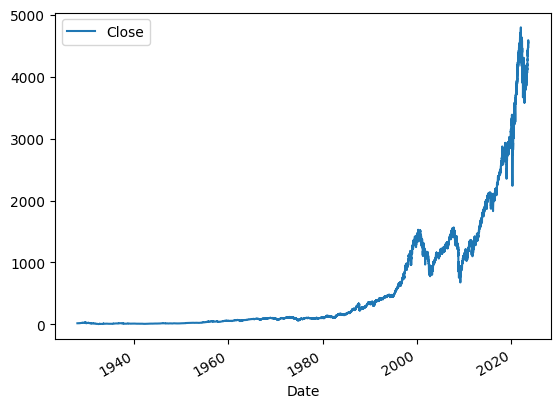

In [58]:
sp500.plot.line(y = 'Close', use_index = True)

In [59]:
del sp500['Dividends']
del sp500['Stock Splits']

In [60]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [61]:
## setting up the target price
sp500['Next Day'] = sp500['Close'].shift(-1)

In [65]:
sp500.head(10000)

,Open,High,Low,Close,Volume,Next Day
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
1967-11-24 00:00:00-05:00,0.000000,94.459999,92.739998,93.900002,9470000,94.169998
1967-11-27 00:00:00-05:00,0.000000,94.800003,93.320000,94.169998,10040000,94.489998
1967-11-28 00:00:00-05:00,0.000000,95.080002,93.570000,94.489998,11040000,94.470001


In [64]:
sp500.size

144078

In [66]:
sp500['Target'] = (sp500['Next Day'] > sp500['Close']).astype(int)

In [68]:
sp500

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0


In [69]:
### removing older data than 1990
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0


## Building the ML model

In [70]:
## RandomForestClassifier uses bunch of decision trees with randomized parameters and then avg the result of the decision trees
## This is more resistant to overfitting
## Runs faster and can pick up non-linear tendencies in the data

from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

features = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[features], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [91]:
from sklearn.metrics import precision_score

In [92]:
predics = model.predict(test[features])

In [93]:
import pandas as pd

In [94]:
preds = pd.Series(predics, index = test.index)
preds

Date
2023-03-14 00:00:00-04:00    1
2023-03-15 00:00:00-04:00    0
2023-03-16 00:00:00-04:00    1
2023-03-17 00:00:00-04:00    0
2023-03-20 00:00:00-04:00    0
                            ..
2023-07-31 00:00:00-04:00    1
2023-08-01 00:00:00-04:00    1
2023-08-02 00:00:00-04:00    1
2023-08-03 00:00:00-04:00    1
2023-08-04 00:00:00-04:00    1
Length: 100, dtype: int32

In [95]:
precision_score(test['Target'], preds)

0.5636363636363636

In [96]:
## plotting the result
combined = pd.concat([test['Target'], preds], axis = 1)

<Axes: xlabel='Date'>

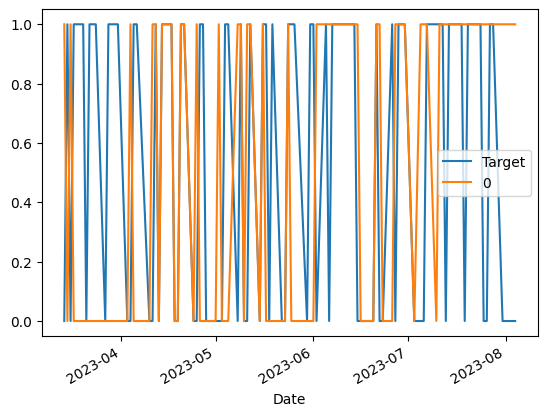

In [98]:
combined.plot()

## Building a BackTesting System

In [109]:
def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    predics = model.predict(test[features])
    preds = pd.Series(predics, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [110]:
def backtest(data, model, features, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, features, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [111]:
predictions = backtest(sp500, model, features)

In [112]:
predictions['Predictions'].value_counts()

Predictions
0    3438
1    2525
Name: count, dtype: int64

In [113]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5291089108910891

In [116]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.533959
0    0.466041
Name: count, dtype: float64

## Adding additional features to the Model

In [118]:
horizons = [2, 5, 60, 250, 1000] ## indicates the no of days before today to calculate the avg stock price
new_features = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_features += [ratio_column, trend_column]

In [119]:
sp500

,Open,High,Low,Close,Volume,Next Day,Target,Close_ratio_2,Close_ratio_5,Close_ratio_60,Close_ratio_250,Close_ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,0.993731,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0,1.000734,1.004465,1.057966,1.131394,1.200692,2.0,3.0,36.0,121.0,536.0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0,0.998666,1.001381,1.053060,1.127839,1.196973,1.0,2.0,36.0,121.0,536.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0,0.993032,0.989834,1.036986,1.111837,1.179904,0.0,2.0,35.0,120.0,536.0


In [120]:
sp500 = sp500.dropna()

In [ ]:
sp500

In [ ]:
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 100, random_state = 1)

In [ ]:
def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    predics = model.predict_proba(test[features])[:,1] ## to get the probability of being 0 or 1
    predics[predics >= 0.6] = 1
    predics[predics < 0.6] = 0
    preds = pd.Series(predics, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_features)

In [ ]:
predictions['Predictions'].value_counts()

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])